In [1]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

问题3-3：进行数据分析

In [ ]:
# 导入租房数据
df_zu_shibo = pd.read_excel('df_zu_shibo.xlsx')
df_zu_gumei = pd.read_excel('df_zu_gumei.xlsx')
df_zu_xujiahui = pd.read_excel('df_zu_xujiahui.xlsx')
df_zu_zhangjiang = pd.read_excel('df_zu_zhangjiang.xlsx')
df_zu = pd.read_excel('data_zu.xlsx')

In [ ]:
# 导入二手房数据
df_esf_shibo = pd.read_excel('df_esf_shibo.xlsx')
df_esf_gumei = pd.read_excel('df_esf_gumei.xlsx')
df_esf_zhangjiang = pd.read_excel('df_esf_zhangjiang.xlsx')
df_esf_xujiahui = pd.read_excel('df_esf_xujiahui.xlsx')
df_esf = pd.read_excel('data_esf.xlsx')

In [ ]:
# 二手房数据描述性统计
list_esf = [df_esf_shibo,df_esf_gumei,df_esf_xujiahui,df_esf_zhangjiang]
block_name = ['世博','古美','徐家汇','张江']

discription = []
for i in range(0,4):
    
    title=['面积','总价格','每平方米价格']
    index=['指标','平均数','中位数','标准差']
    
    mean_area = list_esf[i]['面积'].mean()
    mean_price = list_esf[i]['总价格'].mean()
    mean_price_per = list_esf[i]['每平方米价格'].mean()
    mean = [mean_area,mean_price,mean_price_per]

    median_area = list_esf[i]['面积'].median()
    median_price = list_esf[i]['总价格'].median()
    median_price_per = list_esf[i]['每平方米价格'].median()
    median = [median_area,median_price,median_price_per]

    std_area = list_esf[i]['面积'].std()
    std_price = list_esf[i]['总价格'].std()
    std_price_per = list_esf[i]['每平方米价格'].std()
    std = [std_area,std_price,std_price_per]

    for j in range(0,3):
        discription_information = [block_name[i]+title[j],mean[j],median[j],std[j]]
        discription.append(discription_information)

df_discription = pd.DataFrame(discription)
df_discription.columns = index
df_discription
    

,指标,平均数,中位数,标准差
0,世博面积,8.017838e+01,70.000,3.634474e+01
1,世博总价格,5.109100e+06,3550000.000,3.329057e+06
2,世博每平方米价格,5.898704e+04,53734.000,1.554988e+04
3,古美面积,1.067776e+02,96.115,4.701847e+01
4,古美总价格,8.594567e+06,7425000.000,7.691107e+06
5,古美每平方米价格,7.227459e+04,67633.000,2.138074e+04
6,徐家汇面积,1.077623e+02,108.390,4.671918e+01
7,徐家汇总价格,9.921642e+06,8890000.000,5.738146e+06
8,徐家汇每平方米价格,8.972810e+04,88053.500,1.785033e+04
9,张江面积,1.266951e+02,94.060,1.454187e+02


In [ ]:
# 租房数据描述性统计
list_zu = [df_zu_shibo,df_zu_gumei,df_zu_xujiahui,df_zu_zhangjiang]
block_name = ['世博','古美','徐家汇','张江']

discription = []
for i in range(0,3):
    
    title=['面积','价格']
    index=['指标','平均数','中位数','标准差']
    
    mean_area = list_zu[i]['面积'].mean()
    mean_price = list_zu[i]['价格'].mean()
    mean = [mean_area,mean_price]

    median_area = list_zu[i]['面积'].median()
    median_price = list_zu[i]['价格'].median()
    median = [median_area,median_price]

    std_area = list_zu[i]['面积'].std()
    std_price = list_zu[i]['价格'].std()
    std = [std_area,std_price]

    for j in range(0,2):
        discription_information = [block_name[i]+title[j],mean[j],median[j],std[j]]
        discription.append(discription_information)

df_discription = pd.DataFrame(discription)
df_discription.columns = index
df_discription


,指标,平均数,中位数,标准差
0,世博面积,50.351667,47.0,20.312521
1,世博价格,4994.887500,4600.0,1755.694877
2,古美面积,80.326460,47.0,57.975809
3,古美价格,7861.116838,3200.0,8630.062886
4,徐家汇面积,110.588972,93.0,327.468155
5,徐家汇价格,11735.400000,10350.0,6879.477398


In [ ]:
# 利用Z-score法去除异常值
def detect_outliers_zscore(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    # 计算Z-score
    df_copy = df.copy()
    df_copy['z_score'] = (df_copy[column] - mean) / std
    # 筛选异常值
    outliers = df_copy[abs(df_copy['z_score']) > threshold]
    # 获取异常值行标号
    outlier_indices = outliers.index.tolist()
    return outliers, outlier_indices

def clear_outliers(df):
    df_copy = df.copy()
    outliers_1 = detect_outliers_zscore(df_copy,'面积')
    outliers_2 = detect_outliers_zscore(df_copy,'总价格')
    clear = outliers_1[1]+outliers_2[1]
    df_new = df_copy.drop(index=clear)
    return df_new

#将四个区域的二手房数据的异常值清掉
df_esf_shibo_clear = clear_outliers(df_esf_shibo)
df_esf_gumei_clear = clear_outliers(df_esf_gumei)
df_esf_xujiahui_clear = clear_outliers(df_esf_xujiahui)
df_esf_zhangjiang_clear = clear_outliers(df_esf_zhangjiang)

def clear_outliers_zu(df):
    df_copy = df.copy()
    outliers_1 = detect_outliers_zscore(df_copy,'面积')
    outliers_2 = detect_outliers_zscore(df_copy,'价格')
    clear = outliers_1[1]+outliers_2[1]
    df_new = df_copy.drop(index=clear)
    return df_new

#将四个区域的租房数据的异常值清掉
df_zu_shibo_clear = clear_outliers_zu(df_zu_shibo)
df_zu_gumei_clear = clear_outliers_zu(df_zu_gumei)
df_zu_xujiahui_clear = clear_outliers_zu(df_zu_xujiahui)
df_zu_zhangjiang_clear = clear_outliers_zu(df_zu_zhangjiang)






In [7]:
#每个区域二手房每平方米价格
esf_shibo_price_per_m2 = df_esf_shibo_clear['每平方米价格']
esf_gumei_price_per_m2 = df_esf_gumei_clear['每平方米价格']
esf_xujiahui_price_per_m2 = df_esf_xujiahui_clear['每平方米价格']
esf_zhangjiang_price_per_m2 = df_esf_zhangjiang_clear['每平方米价格']

#每个区域租房每月每平方米价格
zu_shibo_price_per_m2 = df_zu_shibo_clear['价格'] / df_zu_shibo_clear['面积']
zu_gumei_price_per_m2 = df_zu_gumei_clear['价格'] / df_zu_gumei_clear['面积']
zu_xujiahui_price_per_m2 = df_zu_xujiahui_clear['价格'] / df_zu_xujiahui_clear['面积']
zu_zhangjiang_price_per_m2 = df_zu_zhangjiang_clear['价格'] / df_zu_zhangjiang_clear['面积']

#每个区域每平方米 median price to rent ratio
shibo_ptr = esf_shibo_price_per_m2.median()/zu_shibo_price_per_m2.median()
gumei_ptr = esf_gumei_price_per_m2.median()/zu_gumei_price_per_m2.median()
xujiahui_ptr = esf_xujiahui_price_per_m2.median()/zu_xujiahui_price_per_m2.median()
zhangjiang_ptr = esf_zhangjiang_price_per_m2.median()/zu_zhangjiang_price_per_m2.median()

print("世博地区该指标为：" + str(shibo_ptr))
print("古美地区该指标：" + str(gumei_ptr))
print("徐家汇地区该指标为：" + str(xujiahui_ptr))
print("张江地区该指标为：" + str(zhangjiang_ptr))

世博地区该指标为：525.4032786885246
古美地区该指标：907.7720689655172
徐家汇地区该指标为：725.9589517754691
张江地区该指标为：701.3733333333333


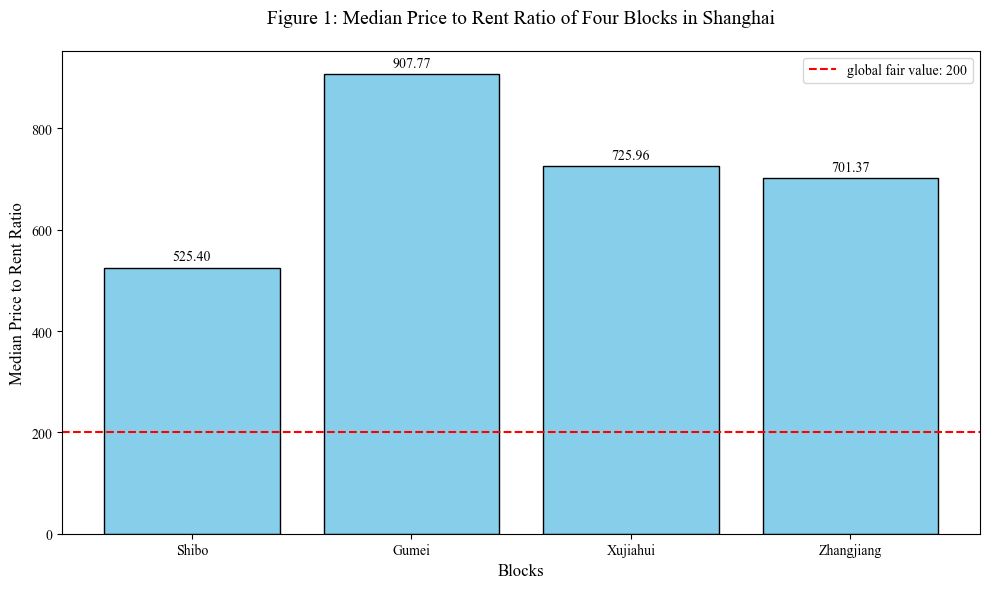

In [82]:
# 画柱状图
plt.rcParams["font.family"] = ["Times New Roman", "serif"]

regions = ['Shibo', 'Gumei', 'Xujiahui', 'Zhangjiang']
ptr_values = [shibo_ptr, gumei_ptr, xujiahui_ptr, zhangjiang_ptr]

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(regions, ptr_values, color='skyblue', edgecolor='black')

global_fair_value = 200
ax.axhline(y=global_fair_value, color='r', linestyle='--', label=f'global fair value: {global_fair_value}')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

ax.set_title('Figure 1: Median Price to Rent Ratio of Four Blocks in Shanghai', fontsize=14, pad=20)
ax.set_xlabel('Blocks', fontsize=12)
ax.set_ylabel('Median Price to Rent Ratio', fontsize=12)
ax.legend()

plt.tight_layout()
plt.show()

问题3-4：ols模型建模

In [ ]:
# 整合四个block的数据
data_esf_clear = pd.concat([df_esf_shibo_clear,df_esf_gumei_clear,df_esf_xujiahui_clear,df_esf_zhangjiang_clear],axis=0)
data_zu_clear = pd.concat([df_zu_shibo_clear,df_zu_gumei_clear,df_zu_xujiahui_clear,df_zu_zhangjiang_clear],axis=0)


In [ ]:
data_esf_clear['每平方米价格'] = pd.to_numeric(data_esf_clear['每平方米价格'], errors='coerce')
data_esf_clear['面积'] = pd.to_numeric(data_esf_clear['面积'], errors='coerce')

In [ ]:
# 拟合ols模型
def ols_regression_with_encoding(df, dependent_var, independent_vars, encode_var):
    # 检查输入的列是否都存在于DataFrame中
    all_vars = [dependent_var] + independent_vars
    for var in all_vars:
        if var not in df.columns:
            raise ValueError(f"列 '{var}' 不存在于DataFrame中")
    
    # 对指定变量进行独热编码
    df_encoded = pd.get_dummies(df, columns=[encode_var], drop_first=True)
    
    # 构建公式字符串
    encoded_vars = [col for col in df_encoded.columns if col.startswith(encode_var)]
    other_var = [var for var in independent_vars if var != encode_var][0]
    formula = f"{dependent_var} ~ {other_var} + " + " + ".join(encoded_vars)
    
    # 执行OLS回归
    model = ols(formula, data=df_encoded).fit()
    
    return model
    

In [ ]:
# 二手房数据的ols回归
dependent_var = '每平方米价格'
independent_vars = ['面积','路段']

ols_esf_result = ols_regression_with_encoding(data_esf_clear,dependent_var,independent_vars,'路段')
ols_esf_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 每平方米价格   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     554.7
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        07:10:40   Log-Likelihood:                -45939.
No. Observations:                4059   AIC:                         9.189e+04
Df Residuals:                    4054   BIC:                         9.192e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.621e+04    775.336     59.600      0.000    4.47e+04    4.77e+04
路段_古美[T.True]   8652.8063   1074.526      8.053      0.000    6546.144    1.08e+04
路段_张江[T.True]  -1210.6043    846.251     -1.431      0.153   -2869.721     448.513
路段_徐家汇[T.True]  2.618e+04    834.005     31.394      0.000    2.45e+04    2.78e+04
面积               159.9217      6.521     24.524      0.000     147.137     172.706
==============================================================================
Omnibus:                      747.768   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1621.748
Skew:                           1.067   Prob(JB):                         0.00
Kurtosis:                       5.245   Cond. No.                         475.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 租房数据的ols回归
data_zu_clear['每平方米租金'] = data_zu_clear['价格'] / data_zu_clear['面积']
dependent_var = '每平方米租金'
independent_vars = ['面积','二级地址']

ols_zu_result = ols_regression_with_encoding(data_zu_clear,dependent_var,independent_vars,'二级地址')
ols_zu_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 每平方米租金   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     515.9
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        07:48:30   Log-Likelihood:                -19337.
No. Observations:                4096   AIC:                         3.868e+04
Df Residuals:                    4091   BIC:                         3.872e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          111.4266      0.968    115.159      0.000     109.530     113.324
二级地址_古美[T.True]    -18.8240      1.424    -13.218      0.000     -21.616     -16.032
二级地址_张江[T.True]    -23.3978      1.119    -20.902      0.000     -25.592     -21.203
二级地址_徐家汇[T.True]    28.3973      1.238     22.940      0.000      25.970      30.824
面积                  -0.1618      0.011    -14.171      0.000      -0.184      -0.139
==============================================================================
Omnibus:                     1088.860   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3567.089
Skew:                           1.330   Prob(JB):                         0.00
Kurtosis:                       6.718   Cond. No.                         330.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

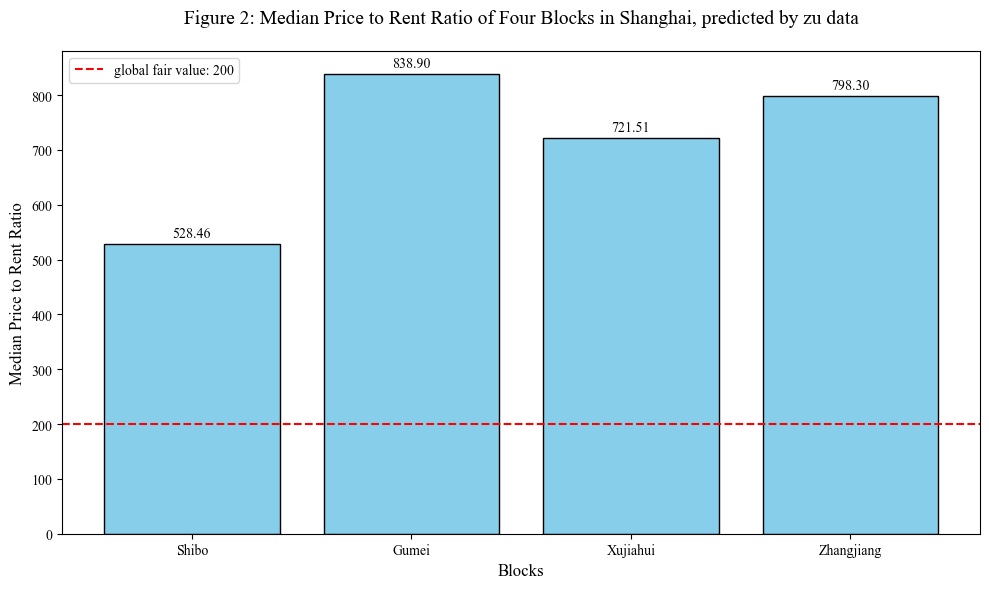

In [83]:
# 为出租房估计房价
intercept_esf = ols_esf_result.params['Intercept']
location_esf_gumei = ols_esf_result.params['路段_古美[T.True]']
location_esf_xujiahui = ols_esf_result.params['路段_徐家汇[T.True]']
location_esf_zhangjiang = ols_esf_result.params['路段_张江[T.True]']
area_esf = ols_esf_result.params['面积']

esf_shibo_predict = pd.DataFrame((df_zu_shibo['面积']*area_esf + intercept_esf))

esf_gumei_predict = pd.DataFrame((df_zu_gumei['面积']*area_esf + location_esf_gumei + intercept_esf))

esf_xujiahui_predict = pd.DataFrame((df_zu_xujiahui['面积']*area_esf + location_esf_xujiahui + intercept_esf))

esf_zhangjiang_predict = pd.DataFrame((df_zu_xujiahui['面积']*area_esf + location_esf_zhangjiang + intercept_esf))

# 利用租房数据得到的每个区域每平方米 median price to rent ratio
zu_shibo_ptr = float((esf_shibo_predict.median()/zu_shibo_price_per_m2.median()).iloc[0])
zu_gumei_ptr = float((esf_gumei_predict.median()/zu_gumei_price_per_m2.median()).iloc[0])
zu_xujiahui_ptr = float((esf_xujiahui_predict.median()/zu_xujiahui_price_per_m2.median()).iloc[0])
zu_zhangjiang_ptr = float((esf_zhangjiang_predict.median()/zu_zhangjiang_price_per_m2.median()).iloc[0])

# 画柱状图
plt.rcParams["font.family"] = ["Times New Roman", "serif"]

regions = ['Shibo', 'Gumei', 'Xujiahui', 'Zhangjiang']
ptr_values = [zu_shibo_ptr, zu_gumei_ptr, zu_xujiahui_ptr, zu_zhangjiang_ptr]

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(regions, ptr_values, color='skyblue', edgecolor='black')

global_fair_value = 200
ax.axhline(y=global_fair_value, color='r', linestyle='--', label=f'global fair value: {global_fair_value}')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

ax.set_title('Figure 2: Median Price to Rent Ratio of Four Blocks in Shanghai, predicted by zu data', fontsize=14, pad=20)
ax.set_xlabel('Blocks', fontsize=12)
ax.set_ylabel('Median Price to Rent Ratio', fontsize=12)
ax.legend()

plt.tight_layout()
plt.show()

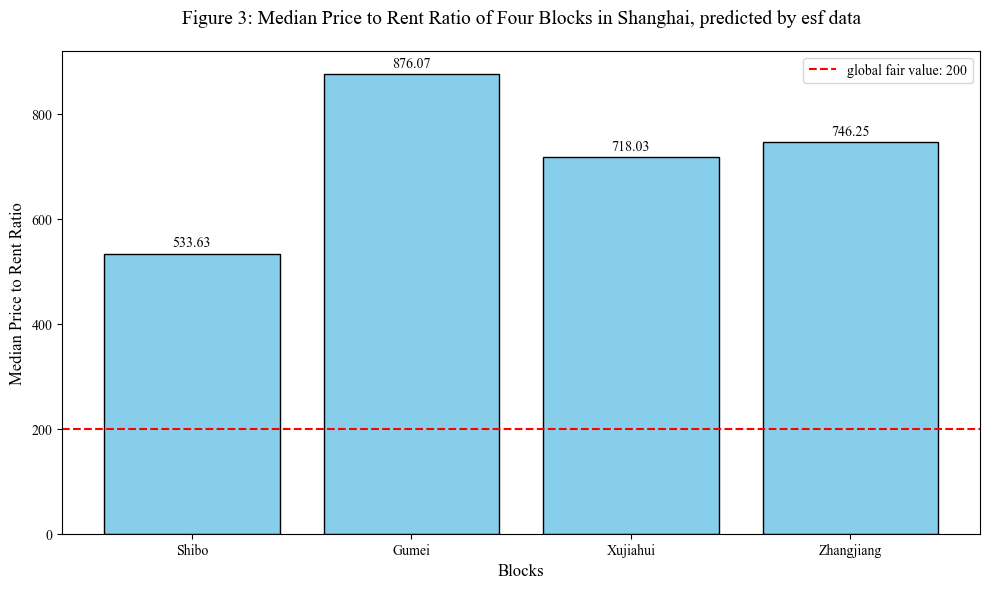

In [84]:
# 为二手房估计租价
intercept_zu = ols_zu_result.params['Intercept']
location_zu_gumei = ols_zu_result.params['二级地址_古美[T.True]']
location_zu_xujiahui = ols_zu_result.params['二级地址_徐家汇[T.True]']
location_zu_zhangjiang = ols_zu_result.params['二级地址_张江[T.True]']
area_zu = ols_zu_result.params['面积']

zu_shibo_predict = pd.DataFrame((df_esf_shibo['面积']*area_zu + intercept_zu))

zu_gumei_predict = pd.DataFrame((df_esf_gumei['面积']*area_zu + location_zu_gumei + intercept_zu))

zu_xujiahui_predict = pd.DataFrame((df_esf_xujiahui['面积']*area_zu + location_zu_xujiahui + intercept_zu))

zu_zhangjiang_predict = pd.DataFrame((df_esf_xujiahui['面积']*area_zu + location_zu_zhangjiang + intercept_zu))

# 利用二手房数据得到的每个区域每平方米 median price to rent ratio
esf_shibo_ptr = float((esf_shibo_price_per_m2.median()/zu_shibo_predict.median()).iloc[0])
esf_gumei_ptr = float((esf_gumei_price_per_m2.median()/zu_gumei_predict.median()).iloc[0])
esf_xujiahui_ptr = float((esf_xujiahui_price_per_m2.median()/zu_xujiahui_predict.median()).iloc[0])
esf_zhangjiang_ptr = float((esf_zhangjiang_price_per_m2.median()/zu_zhangjiang_predict.median()).iloc[0])

# 画柱状图
plt.rcParams["font.family"] = ["Times New Roman", "serif"]

regions = ['Shibo', 'Gumei', 'Xujiahui', 'Zhangjiang']
ptr_values = [esf_shibo_ptr, esf_gumei_ptr, esf_xujiahui_ptr, esf_zhangjiang_ptr]

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(regions, ptr_values, color='skyblue', edgecolor='black')

global_fair_value = 200
ax.axhline(y=global_fair_value, color='r', linestyle='--', label=f'global fair value: {global_fair_value}')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

ax.set_title('Figure 3: Median Price to Rent Ratio of Four Blocks in Shanghai, predicted by esf data', fontsize=14, pad=20)
ax.set_xlabel('Blocks', fontsize=12)
ax.set_ylabel('Median Price to Rent Ratio', fontsize=12)
ax.legend()

plt.tight_layout()
plt.show()



问题3-5：利用plus模型回归预测

In [ ]:
#拟合带有二次项和交互项的ols回归
def ols_regression_with_terms(df, dependent_var, continuous_var, categorical_var):
    
    # 创建连续变量平方项
    df_extended = df.copy()
    df_extended[f'{continuous_var}_sq'] = df_extended[continuous_var] **2
    
    # 对分类变量独热编码
    df_encoded = pd.get_dummies(df_extended, columns=[categorical_var], drop_first=True)
    encoded_cat_vars = [col for col in df_encoded.columns if col.startswith(categorical_var)]
    
    # 构建基础项：连续变量+连续变量平方+编码后的分类变量
    base_terms = [continuous_var, f'{continuous_var}_sq'] + encoded_cat_vars
    
    # 构建交互项：连续变量与每个编码后的分类变量的交互
    interaction_terms = [f'{continuous_var}:{cat_var}' for cat_var in encoded_cat_vars]
    
    # 组合所有项构建公式
    all_terms = base_terms + interaction_terms
    formula = f"{dependent_var} ~ " + " + ".join(all_terms)
    
    # 执行OLS回归
    model = ols(formula, data=df_encoded).fit()
    
    return model

In [ ]:
# 二手房数据的ols回归
dependent_var = '每平方米价格'
independent_vars = ['面积','路段']

ols_esf_result_plus = ols_regression_with_terms(data_esf_clear,'每平方米价格','面积','路段')
ols_esf_result_plus.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 每平方米价格   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     326.0
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        07:56:53   Log-Likelihood:                -45816.
No. Observations:                4059   AIC:                         9.165e+04
Df Residuals:                    4050   BIC:                         9.171e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.049e+04   1434.634     21.250      0.000    2.77e+04    3.33e+04
路段_古美[T.True]      9700.0733   2842.750      3.412      0.001    4126.720    1.53e+04
路段_张江[T.True]     -5035.5798   2368.963     -2.126      0.034   -9680.051    -391.109
路段_徐家汇[T.True]     4.269e+04   2075.649     20.566      0.000    3.86e+04    4.68e+04
面积                  416.5380     18.707     22.266      0.000     379.862     453.215
面积:路段_古美[T.True]    -42.4344     27.359     -1.551      0.121     -96.073      11.204
面积:路段_张江[T.True]      9.8197     23.767      0.413      0.680     -36.776      56.415
面积:路段_徐家汇[T.True]  -188.7439     21.015     -8.981      0.000    -229.945    -147.543
面积_sq                -0.6194      0.054    -11.559      0.000      -0.724      -0.514
==============================================================================
Omnibus:                      828.629   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2008.241
Skew:                           1.127   Prob(JB):                         0.00
Kurtosis:                       5.606   Cond. No.                     2.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 租房数据的ols回归
ols_zu_result_plus = ols_regression_with_terms(data_zu_clear,'每平方米租金','面积','二级地址')
ols_zu_result_plus.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 每平方米租金   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     423.1
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        07:57:09   Log-Likelihood:                -18938.
No. Observations:                4096   AIC:                         3.789e+04
Df Residuals:                    4087   BIC:                         3.795e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             145.5625      2.363     61.596      0.000     140.929     150.196
二级地址_古美[T.True]       -79.4395      3.123    -25.435      0.000     -85.563     -73.316
二级地址_张江[T.True]       -45.2821      2.612    -17.338      0.000     -50.403     -40.162
二级地址_徐家汇[T.True]       14.0143      3.048      4.598      0.000       8.039      19.990
面积                     -0.9341      0.049    -19.163      0.000      -1.030      -0.839
面积:二级地址_古美[T.True]      0.9980      0.053     18.883      0.000       0.894       1.102
面积:二级地址_张江[T.True]      0.4128      0.050      8.235      0.000       0.315       0.511
面积:二级地址_徐家汇[T.True]     0.4095      0.051      8.003      0.000       0.309       0.510
面积_sq                   0.0013      0.000      8.259      0.000       0.001       0.002
==============================================================================
Omnibus:                      953.888   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4099.375
Skew:                           1.074   Prob(JB):                         0.00
Kurtosis:                       7.405   Cond. No.                     1.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

plus 模型具有更高的R^2，模型能捕捉到更多原本被忽略的变异，例如 “非线性关系”和“自变量间协同作用”

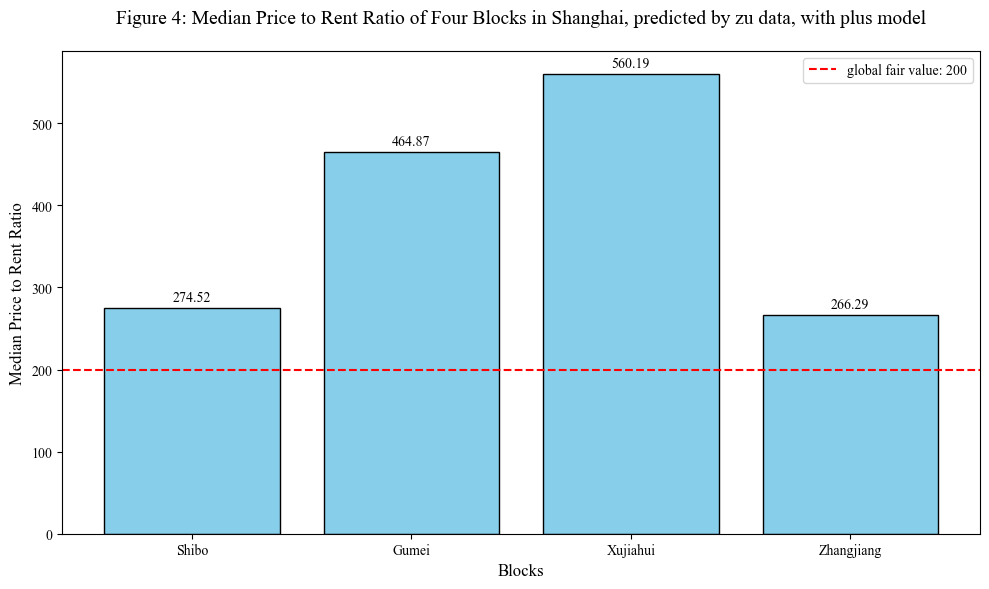

In [85]:
# 为出租房估计房价，利用plus模型
intercept_esf = ols_esf_result_plus.params['路段_古美[T.True]']
location_esf_xujiahui = ols_esf_result_plus.params['路段_徐家汇[T.True]']
location_esf_zhangjiang = ols_esf_result_plus.params['路段_张江[T.True]']
area_esf = ols_esf_result_plus.params['面积']
cross_esf_gumei = ols_esf_result_plus.params['面积:路段_古美[T.True]']
cross_esf_xujiahui = ols_esf_result_plus.params['面积:路段_徐家汇[T.True]']
cross_esf_zhangjiang = ols_esf_result_plus.params['面积:路段_张江[T.True]']
area_sqare = ols_esf_result_plus.params['面积_sq']

esf_shibo_predict = pd.DataFrame((df_zu_shibo['面积']*area_esf + df_zu_shibo['面积']*df_zu_shibo['面积']*area_sqare + intercept_esf))

esf_gumei_predict = pd.DataFrame((df_zu_gumei['面积']*area_esf + location_esf_gumei + df_zu_gumei['面积']*cross_esf_gumei + df_zu_gumei['面积']*df_zu_gumei['面积']*area_sqare + intercept_esf))

esf_xujiahui_predict = pd.DataFrame((df_zu_xujiahui['面积']*area_esf + location_esf_xujiahui + df_zu_xujiahui['面积']*cross_esf_xujiahui + df_zu_xujiahui['面积']*df_zu_xujiahui['面积']*area_sqare + intercept_esf))

esf_zhangjiang_predict = pd.DataFrame((df_zu_zhangjiang['面积']*area_esf + location_esf_zhangjiang + df_zu_zhangjiang['面积']*cross_esf_zhangjiang + df_zu_zhangjiang['面积']*df_zu_zhangjiang['面积']*area_sqare + intercept_esf))

# 利用租房数据得到的每个区域每平方米 median price to rent ratio
zu_shibo_ptr = float((esf_shibo_predict.median()/zu_shibo_price_per_m2.median()).iloc[0])
zu_gumei_ptr = float((esf_gumei_predict.median()/zu_gumei_price_per_m2.median()).iloc[0])
zu_xujiahui_ptr = float((esf_xujiahui_predict.median()/zu_xujiahui_price_per_m2.median()).iloc[0])
zu_zhangjiang_ptr = float((esf_zhangjiang_predict.median()/zu_zhangjiang_price_per_m2.median()).iloc[0])

# 画柱状图
plt.rcParams["font.family"] = ["Times New Roman", "serif"]

regions = ['Shibo', 'Gumei', 'Xujiahui', 'Zhangjiang']
ptr_values = [zu_shibo_ptr, zu_gumei_ptr, zu_xujiahui_ptr, zu_zhangjiang_ptr]

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(regions, ptr_values, color='skyblue', edgecolor='black')

global_fair_value = 200
ax.axhline(y=global_fair_value, color='r', linestyle='--', label=f'global fair value: {global_fair_value}')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

ax.set_title('Figure 4: Median Price to Rent Ratio of Four Blocks in Shanghai, predicted by zu data, with plus model', fontsize=14, pad=20)
ax.set_xlabel('Blocks', fontsize=12)
ax.set_ylabel('Median Price to Rent Ratio', fontsize=12)
ax.legend()

plt.tight_layout()
plt.show()

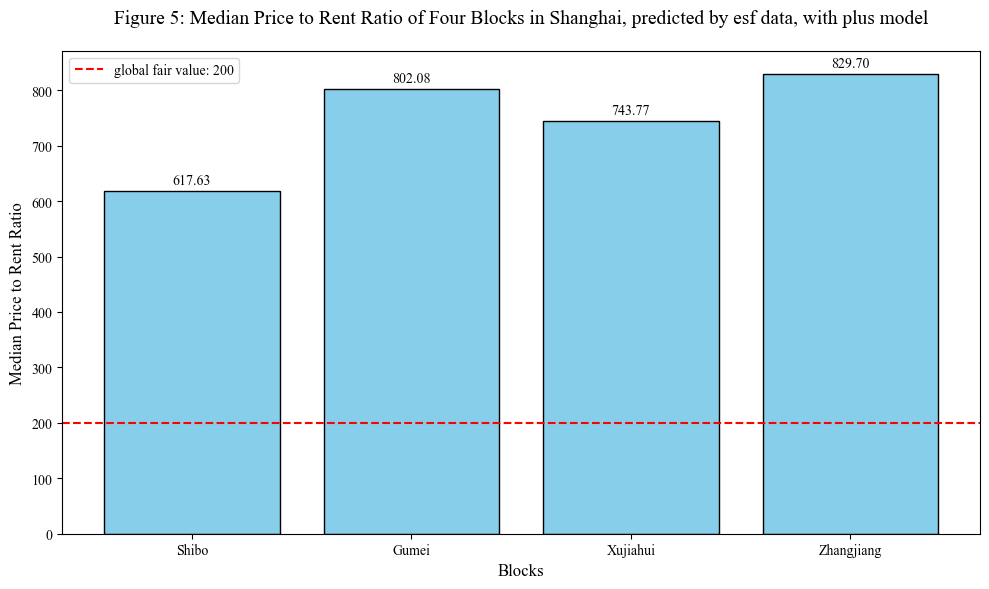

In [86]:
# 为二手房估计租价，利用plus模型
intercept_zu = ols_zu_result_plus.params['Intercept']
location_zu_gumei = ols_zu_result_plus.params['二级地址_古美[T.True]']
location_zu_xujiahui = ols_zu_result_plus.params['二级地址_徐家汇[T.True]']
location_zu_zhangjiang = ols_zu_result_plus.params['二级地址_张江[T.True]']
area_zu = ols_zu_result_plus.params['面积']
cross_zu_gumei = ols_zu_result_plus.params['面积:二级地址_古美[T.True]']
cross_zu_xujiahui = ols_zu_result_plus.params['面积:二级地址_徐家汇[T.True]']
cross_zu_zhangjiang = ols_zu_result_plus.params['面积:二级地址_张江[T.True]']
area_sqare = ols_zu_result_plus.params['面积_sq']


zu_shibo_predict = pd.DataFrame((df_esf_shibo['面积']*area_zu + df_esf_shibo['面积']*df_esf_shibo['面积']*area_sqare + intercept_zu))

zu_gumei_predict = pd.DataFrame((df_esf_gumei['面积']*area_zu + location_zu_gumei + df_esf_gumei['面积']*cross_zu_gumei + df_esf_gumei['面积']*df_esf_gumei['面积']*area_sqare + intercept_zu))

zu_xujiahui_predict = pd.DataFrame((df_esf_xujiahui['面积']*area_zu + location_zu_xujiahui + df_esf_xujiahui['面积']*cross_zu_xujiahui + df_esf_xujiahui['面积']*df_esf_xujiahui['面积']*area_sqare + intercept_zu))

zu_zhangjiang_predict = pd.DataFrame((df_esf_zhangjiang['面积']*area_zu + location_zu_zhangjiang + df_esf_zhangjiang['面积']*cross_zu_zhangjiang + df_esf_zhangjiang['面积']*df_esf_zhangjiang['面积']*area_sqare + intercept_zu))

# 利用二手房数据得到的每个区域每平方米 median price to rent ratio
esf_shibo_ptr = float((esf_shibo_price_per_m2.median()/zu_shibo_predict.median()).iloc[0])
esf_gumei_ptr = float((esf_gumei_price_per_m2.median()/zu_gumei_predict.median()).iloc[0])
esf_xujiahui_ptr = float((esf_xujiahui_price_per_m2.median()/zu_xujiahui_predict.median()).iloc[0])
esf_zhangjiang_ptr = float((esf_zhangjiang_price_per_m2.median()/zu_zhangjiang_predict.median()).iloc[0])

# 画柱状图
plt.rcParams["font.family"] = ["Times New Roman", "serif"]

regions = ['Shibo', 'Gumei', 'Xujiahui', 'Zhangjiang']
ptr_values = [esf_shibo_ptr, esf_gumei_ptr, esf_xujiahui_ptr, esf_zhangjiang_ptr]

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(regions, ptr_values, color='skyblue', edgecolor='black')

global_fair_value = 200
ax.axhline(y=global_fair_value, color='r', linestyle='--', label=f'global fair value: {global_fair_value}')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

ax.set_title('Figure 5: Median Price to Rent Ratio of Four Blocks in Shanghai, predicted by esf data, with plus model', fontsize=14, pad=20)
ax.set_xlabel('Blocks', fontsize=12)
ax.set_ylabel('Median Price to Rent Ratio', fontsize=12)
ax.legend()

plt.tight_layout()
plt.show()

利用租房数据估计其房价，并利用该组数据计算出的 median price to rent ratio 最可信（即figure 4所示结果），因为该组结果最接近global fair value，而其他方法计算的结果与该值偏离过大。